# 🛒 Mohkart Customer Segmentation

## 📌 Problem Statement

**Client**: *Mohkart* — a leading Indian e-commerce player — wants to understand their customer base better by identifying distinct customer segments. They aim to leverage these insights to optimize operations and enhance marketing strategies.

---

## 🎯 Objective

1. **Customer Profiling**:  
   Segment customers based on demographics and purchase behavior using clustering techniques.

2. **Insights Generation**:  
   Analyze spending habits and browsing behavior to identify trends and anomalies across segments.

3. **Storytelling & Visualization**:  
   Use compelling visual tools (charts, dashboards) to communicate the findings in an intuitive manner for both technical and business stakeholders.

---

## 📝 Column Descriptions

| Column Name       | Description |
|-------------------|-------------|
| **CustomerID**     | Unique identifier of a customer. Not used for clustering directly. |
| **Age**            | Age of the customer in years. Important for profiling. |
| **Device**         | Type of device used during purchase (e.g., Mobile, Tablet, Desktop). Categorical. |
| **City**           | Customer's city of residence. Useful for geographic segmentation. |
| **Product**        | Product purchased. Represents customer interest/preference. |
| **Price**          | Price of a single unit of the purchased product. |
| **Quantity**       | Number of units bought in the transaction. |
| **PurchaseDate**   | Date of transaction. Can be used for temporal analysis. |
| **BrowsingTime**   | Time (in seconds/minutes) spent browsing before making the purchase. Indicates interest level or decisiveness. |

---



## **Libraries Importation**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

from sklearn.utils import resample

from lightgbm import LGBMClassifier

## **Data Importation**

In [4]:
data = pd.read_excel(r'/content/Data Set.xlsx')

In [5]:
data.head()

CustomerID  Age   Device       City           Product         Price  \
0        9597   42   Mobile   Vadodara  Smart Thermostat   4441.406091   
1       11891   26   Tablet   Vadodara            Camera  35274.014252   
2       19067   61  Desktop    Kolkata        Microphone    784.924822   
3       19392   24  Desktop     Meerut     Action Camera  11000.476305   
4       57501   60  Desktop  Faridabad        Microphone   2814.737205   

   Quantity        PurchaseDate  BrowsingTime  
0         2 2021-08-06 05:29:38             9  
1         6 2022-11-25 01:54:51             1  
2         2 2022-12-10 10:25:27            20  
3         8 2023-02-24 16:24:13             8  
4         5 2021-09-15 02:45:31            10

## **Descriptive Statistics**

In [6]:
print(f'The Number of Rows Present in the data are {data.shape[0]}')
print(f'The Number of Columns Present in the data are {data.shape[1]}')

The Number of Rows Present in the data are 100000
The Number of Columns Present in the data are 9


In [7]:
data.columns

Index(['CustomerID', 'Age', 'Device', 'City', 'Product', 'Price', 'Quantity',
       'PurchaseDate', 'BrowsingTime'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CustomerID    100000 non-null  int64         
 1   Age           100000 non-null  int64         
 2   Device        100000 non-null  object        
 3   City          100000 non-null  object        
 4   Product       100000 non-null  object        
 5   Price         100000 non-null  float64       
 6   Quantity      100000 non-null  int64         
 7   PurchaseDate  100000 non-null  datetime64[ns]
 8   BrowsingTime  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [9]:
data.describe().T

count                           mean                  min  \
CustomerID    100000.0                    49995.40195                  3.0   
Age           100000.0                       44.05669                 18.0   
Price         100000.0                   12499.116588           100.157985   
Quantity      100000.0                        5.50853                  1.0   
PurchaseDate    100000  2022-02-16 17:58:20.675149824  2020-01-01 00:19:15   
BrowsingTime  100000.0                       10.00763                  0.0   

                                        25%                  50%  \
CustomerID                          24926.5              50024.0   
Age                                    31.0                 44.0   
Price                            1751.33541          4516.202837   
Quantity                                3.0                  6.0   
PurchaseDate  2021-01-21 10:27:48.249999872  2022-02-16 01:43:06   
BrowsingTime                            5.0                 10.0   

                              75%                  max           std  
CustomerID                75072.0              99999.0  28889.584888  
Age                          57.0                 70.0     15.298008  
Price                11391.843495        199988.317638  22943.009995  
Quantity                      8.0                 10.0      2.872739  
PurchaseDate  2023-03-12 15:43:33  2024-04-10 10:23:28           NaN  
BrowsingTime                 15.0                 20.0      6.062808

In [10]:
# Let's have a look on summary of our categorical columns

data.describe(include = object).T

count unique                 top   freq
Device   100000      3              Tablet  33570
City     100000     49  Thiruvananthapuram   2144
Product  100000     49    Wireless Earbuds   2128

In [11]:
# Lets have a look on City wise distribution of CUstomer

cnt = data['City'].value_counts(normalize= True)*100

pd.DataFrame({"Name of City" : cnt.index,
              "Percentage of Customer" : cnt.values})



Name of City  Percentage of Customer
0   Thiruvananthapuram                   2.144
1           Vijayawada                   2.138
2                Surat                   2.127
3              Dhanbad                   2.105
4               Nagpur                   2.101
5                Hubli                   2.086
6              Gwalior                   2.078
7                 Kota                   2.072
8               Jaipur                   2.071
9             Guwahati                   2.062
10              Ranchi                   2.061
11             Kolkata                   2.060
12              Rajkot                   2.060
13            Ludhiana                   2.060
14             Lucknow                   2.058
15              Indore                   2.057
16               Patna                   2.055
17           Moradabad                   2.052
18            Jabalpur                   2.052
19            Tiruppur                   2.051
20            Bareilly                   2.049
21                Pune                   2.048
22              Raipur                   2.047
23             Jodhpur                   2.044
24              Mumbai                   2.042
25         Navi Mumbai                   2.036
26                Agra                   2.035
27           Faridabad                   2.035
28              Mysore                   2.031
29              Howrah                   2.029
30              Meerut                   2.029
31     Tiruchirappalli                   2.028
32             Chennai                   2.026
33            Varanasi                   2.024
34           Bangalore                   2.023
35             Solapur                   2.022
36              Kanpur                   2.019
37               Thane                   2.015
38            Vadodara                   2.007
39          Aurangabad                   2.005
40               Delhi                   2.005
41          Chandigarh                   2.004
42              Bhopal                   2.004
43           Allahabad                   1.992
44              Nashik                   1.984
45            Amritsar                   1.981
46           Hyderabad                   1.976
47            Srinagar                   1.975
48           Ahmedabad                   1.935

In [12]:
# Let's Analyse the Percentage of Customers by devices

data['Device'].value_counts(normalize=True)*100

Device
Tablet     33.570
Desktop    33.416
Mobile     33.014
Name: proportion, dtype: float64

In [13]:
# Lets have a look on Product wise distribution of CUstomer

cnt = data['Product'].value_counts(normalize= True)*100

pd.DataFrame({"Name of Product" : cnt.index,
              "Percentage of Customer" : cnt.values})

Name of Product  Percentage of Customer
0      Wireless Earbuds                   2.128
1            Smartwatch                   2.119
2         E-book Reader                   2.111
3               Gamepad                   2.109
4            Television                   2.108
5           Car Charger                   2.105
6                 Drone                   2.092
7            Headphones                   2.090
8               Monitor                   2.090
9            Microphone                   2.084
10              Printer                   2.084
11    Smart Home Device                   2.080
12       Gaming Console                   2.077
13        Action Camera                   2.071
14              SD Card                   2.068
15             Keyboard                   2.063
16      Fitness Tracker                   2.061
17               Webcam                   2.057
18              Earbuds                   2.053
19           Smartphone                   2.052
20           VR Headset                   2.052
21               Tablet                   2.051
22       Gaming Headset                   2.051
23            NAS Drive                   2.043
24      USB Flash Drive                   2.042
25                Mouse                   2.041
26           Smart Plug                   2.040
27           Smart Bulb                   2.033
28     Smart Thermostat                   2.030
29               Laptop                   2.027
30      Voice Assistant                   2.025
31       Graphic Tablet                   2.020
32    Bluetooth Speaker                   2.019
33     Wireless Charger                   2.018
34         Gaming Mouse                   2.017
35       Digital Camera                   2.015
36  External Hard Drive                   2.011
37    Wireless Keyboard                   2.011
38        Graphics Card                   2.006
39         MicroSD Card                   2.005
40       Wireless Mouse                   1.998
41      Security Camera                   1.989
42           Smart Lock                   1.986
43               Camera                   1.979
44           Power Bank                   1.971
45      Gaming Keyboard                   1.971
46            Projector                   1.967
47               Router                   1.956
48         Portable SSD                   1.924

SO BEFORE WE PROCEED TO EXPLORATORY DATA ANALYSIS (EDA) FIRSTLY I HAVE TO TAKE A FEW STEPS

- 1. SPLIT COLUMN DATETIME

- 2. CREATE A NEW COLUMN REVENUE VIA THE USE OF PRICE AND QUANTITY

In [14]:
# Creation of Revenue COlumn

data['Revenue'] = data['Price'] * data['Quantity']

In [15]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])



# Splitting PurchaseDate into various columns

data['year'] = data['PurchaseDate'].dt.year

data['month'] = data['PurchaseDate'].dt.month

data['day'] = data['PurchaseDate'].dt.day

data['hour'] = data['PurchaseDate'].dt.hour

data['dayofweek'] = data['PurchaseDate'].dt.dayofweek



# Drop original column

data = data.drop(columns=['PurchaseDate'])

In [16]:
data

CustomerID  Age   Device       City            Product         Price  \
0            9597   42   Mobile   Vadodara   Smart Thermostat   4441.406091   
1           11891   26   Tablet   Vadodara             Camera  35274.014252   
2           19067   61  Desktop    Kolkata         Microphone    784.924822   
3           19392   24  Desktop     Meerut      Action Camera  11000.476305   
4           57501   60  Desktop  Faridabad         Microphone   2814.737205   
...           ...  ...      ...        ...                ...           ...   
99995       43568   60   Mobile   Srinagar     Gaming Console  37964.020836   
99996       60169   60   Tablet   Srinagar            Printer   2614.051519   
99997       50955   35   Mobile      Delhi  Bluetooth Speaker   4465.469808   
99998       86160   23   Mobile   Vadodara            Earbuds    506.209955   
99999       84961   69   Tablet    Lucknow             Router   1325.243854   

       Quantity  BrowsingTime        Revenue  year  month  day  hour  \
0             2             9    8882.812181  2021      8    6     5   
1             6             1  211644.085513  2022     11   25     1   
2             2            20    1569.849644  2022     12   10    10   
3             8             8   88003.810440  2023      2   24    16   
4             5            10   14073.686023  2021      9   15     2   
...         ...           ...            ...   ...    ...  ...   ...   
99995         4             0  151856.083343  2023     11   13    13   
99996         5             8   13070.257594  2022      7   31    14   
99997         8            10   35723.758467  2021      7    4    22   
99998         8            19    4049.679640  2024      2   12    17   
99999         8            16   10601.950832  2021     12    1     9   

       dayofweek  
0              4  
1              4  
2              5  
3              4  
4              2  
...          ...  
99995          0  
99996          6  
99997          6  
99998          0  
99999          2  

[100000 rows x 14 columns]

In [17]:
data['CustomerID'].unique()

array([ 9597, 11891, 19067, ..., 90528, 84021, 43568])

In [18]:
data['Age'].unique()

array([42, 26, 61, 24, 60, 50, 67, 49, 43, 56, 70, 27, 21, 31, 69, 48, 54,
       45, 35, 38, 36, 39, 53, 22, 30, 59, 52, 29, 25, 19, 63, 65, 58, 62,
       18, 55, 41, 46, 20, 33, 51, 44, 23, 57, 66, 47, 32, 68, 37, 40, 28,
       64, 34])

In [19]:
# LET'S CONVERT AGE COLUMN TO AGE GROUP AS IT MAKE ANALYSIS MORE FRUITFUL

bins = [17, 24, 34, 44, 54, 64, 100]
labels = ['Teenagers', 'Young Adults', 'Adults', 'Middle-Aged', 'Seniors', 'Elderly']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

data.drop(columns='Age', inplace = True)
data.head()

CustomerID   Device       City           Product         Price  Quantity  \
0        9597   Mobile   Vadodara  Smart Thermostat   4441.406091         2   
1       11891   Tablet   Vadodara            Camera  35274.014252         6   
2       19067  Desktop    Kolkata        Microphone    784.924822         2   
3       19392  Desktop     Meerut     Action Camera  11000.476305         8   
4       57501  Desktop  Faridabad        Microphone   2814.737205         5   

   BrowsingTime        Revenue  year  month  day  hour  dayofweek  \
0             9    8882.812181  2021      8    6     5          4   
1             1  211644.085513  2022     11   25     1          4   
2            20    1569.849644  2022     12   10    10          5   
3             8   88003.810440  2023      2   24    16          4   
4            10   14073.686023  2021      9   15     2          2   

      Age_Group  
0        Adults  
1  Young Adults  
2       Seniors  
3     Teenagers  
4       Seniors

In [20]:
data['Quantity'].unique()

array([ 2,  6,  8,  5,  7,  1,  4, 10,  9,  3])

In [21]:
data['Device'].unique()

array(['Mobile', 'Tablet', 'Desktop'], dtype=object)

In [22]:
data['Product'].unique()

array(['Smart Thermostat', 'Camera', 'Microphone', 'Action Camera',
       'Headphones', 'Wireless Keyboard', 'Gaming Headset',
       'Voice Assistant', 'Security Camera', 'Gaming Console', 'Printer',
       'Mouse', 'Wireless Earbuds', 'SD Card', 'Projector', 'Smart Lock',
       'Smart Bulb', 'Monitor', 'MicroSD Card', 'Smartwatch',
       'Portable SSD', 'Television', 'Wireless Charger', 'Laptop',
       'Smart Home Device', 'Router', 'External Hard Drive', 'NAS Drive',
       'Power Bank', 'Drone', 'Graphics Card', 'Gaming Keyboard',
       'Car Charger', 'Gamepad', 'Digital Camera', 'Graphic Tablet',
       'Bluetooth Speaker', 'USB Flash Drive', 'Smartphone',
       'Gaming Mouse', 'Tablet', 'Fitness Tracker', 'Wireless Mouse',
       'Smart Plug', 'Webcam', 'Keyboard', 'Earbuds', 'E-book Reader',
       'VR Headset'], dtype=object)

In [23]:
data['City'].unique()

array(['Vadodara', 'Kolkata', 'Meerut', 'Faridabad', 'Lucknow',
       'Varanasi', 'Hubli', 'Jabalpur', 'Raipur', 'Kota', 'Bhopal',
       'Bareilly', 'Pune', 'Jodhpur', 'Chandigarh', 'Thane',
       'Thiruvananthapuram', 'Ahmedabad', 'Amritsar', 'Chennai',
       'Tiruchirappalli', 'Allahabad', 'Vijayawada', 'Tiruppur', 'Patna',
       'Gwalior', 'Nagpur', 'Ranchi', 'Navi Mumbai', 'Mysore',
       'Moradabad', 'Srinagar', 'Kanpur', 'Surat', 'Hyderabad',
       'Guwahati', 'Agra', 'Mumbai', 'Delhi', 'Bangalore', 'Ludhiana',
       'Dhanbad', 'Indore', 'Aurangabad', 'Rajkot', 'Howrah', 'Solapur',
       'Jaipur', 'Nashik'], dtype=object)

In [24]:
data['BrowsingTime'].unique()

array([ 9,  1, 20,  8, 10, 18, 11, 12,  6, 13,  7, 16,  3,  4, 15,  0, 17,
       19, 14,  2,  5])

In [25]:
data['year'].unique()

array([2021, 2022, 2023, 2024, 2020], dtype=int32)

In [26]:
data['month'].unique()

array([ 8, 11, 12,  2,  9,  4,  5,  1,  3,  6, 10,  7], dtype=int32)

In [27]:
data['day'].unique()

array([ 6, 25, 10, 24, 15,  1, 26, 28, 11,  5,  9, 20,  2, 12, 18, 31, 19,
        8, 23, 27,  4, 13, 22, 29, 17,  7, 21,  3, 14, 30, 16],
      dtype=int32)

In [28]:
data['hour'].unique()

array([ 5,  1, 10, 16,  2,  4, 20,  9, 11,  8, 22,  6,  7, 13, 23, 15, 18,
       17,  0, 21,  3, 14, 19, 12], dtype=int32)

In [29]:
data['dayofweek'].unique()

array([4, 5, 2, 3, 1, 6, 0], dtype=int32)

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [30]:
data.columns

Index(['CustomerID', 'Device', 'City', 'Product', 'Price', 'Quantity',
       'BrowsingTime', 'Revenue', 'year', 'month', 'day', 'hour', 'dayofweek',
       'Age_Group'],
      dtype='object')

In [31]:
num_cols = ['CustomerID', 'Price', 'BrowsingTime', 'day', 'Revenue']
cat_cols = [ 'Device', 'City', 'Product',
       'BrowsingTime', 'year', 'month', 'hour', 'dayofweek',
       'Age_Group',  'Quantity']

In [32]:
t = 1
plt.figure(figsize=(12,12))
plt.suptitle('Numerical Columns Analysis via kdeplot ')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.kdeplot(data=data, x = i, fill= True, color = 'tomato')
    plt.title(f'''for {i}
Skewness : {data[i].skew()}
Kurtosis : {data[i].kurt()}''')
    t = t + 1
plt.tight_layout()
plt.show()


Inferences :

1. The distribution of CustomerID is nearly uniform with skewness close to zero, indicating an evenly distributed set of customers across the dataset.

2. Price is highly positively skewed (4.13) with extreme kurtosis (21.14), indicating the presence of a large number of lower-priced items and a few very high-priced outliers.

3. BrowsingTime appears uniformly distributed with negligible skewness and negative kurtosis, suggesting consistent browsing behavior across users.

4. Day variable also shows a uniform pattern, with nearly zero skewness and low negative kurtosis, implying equal activity across all days of the month.

5. Revenue is extremely positively skewed (5.29) and highly leptokurtic (38.05), suggesting that a few transactions contribute to the majority of revenue, indicating high-value anomalies.

6. The flat shape of the CustomerID and day distributions suggests that there is no dominant customer or date influencing the dataset disproportionately.

7. The smooth and uniform nature of the BrowsingTime distribution implies that session lengths are evenly spread, and no specific browsing time dominates.

8. Price and Revenue distributions exhibit long right tails, confirming that while most transactions are of low value, a small fraction are exceptionally high.

9. The high kurtosis values for Price and Revenue signal the presence of heavy tails and potential outliers which may significantly influence statistical modeling.

10. Most variables, excluding Price and Revenue, follow nearly symmetrical distributions, making them suitable for standardization without heavy transformation.


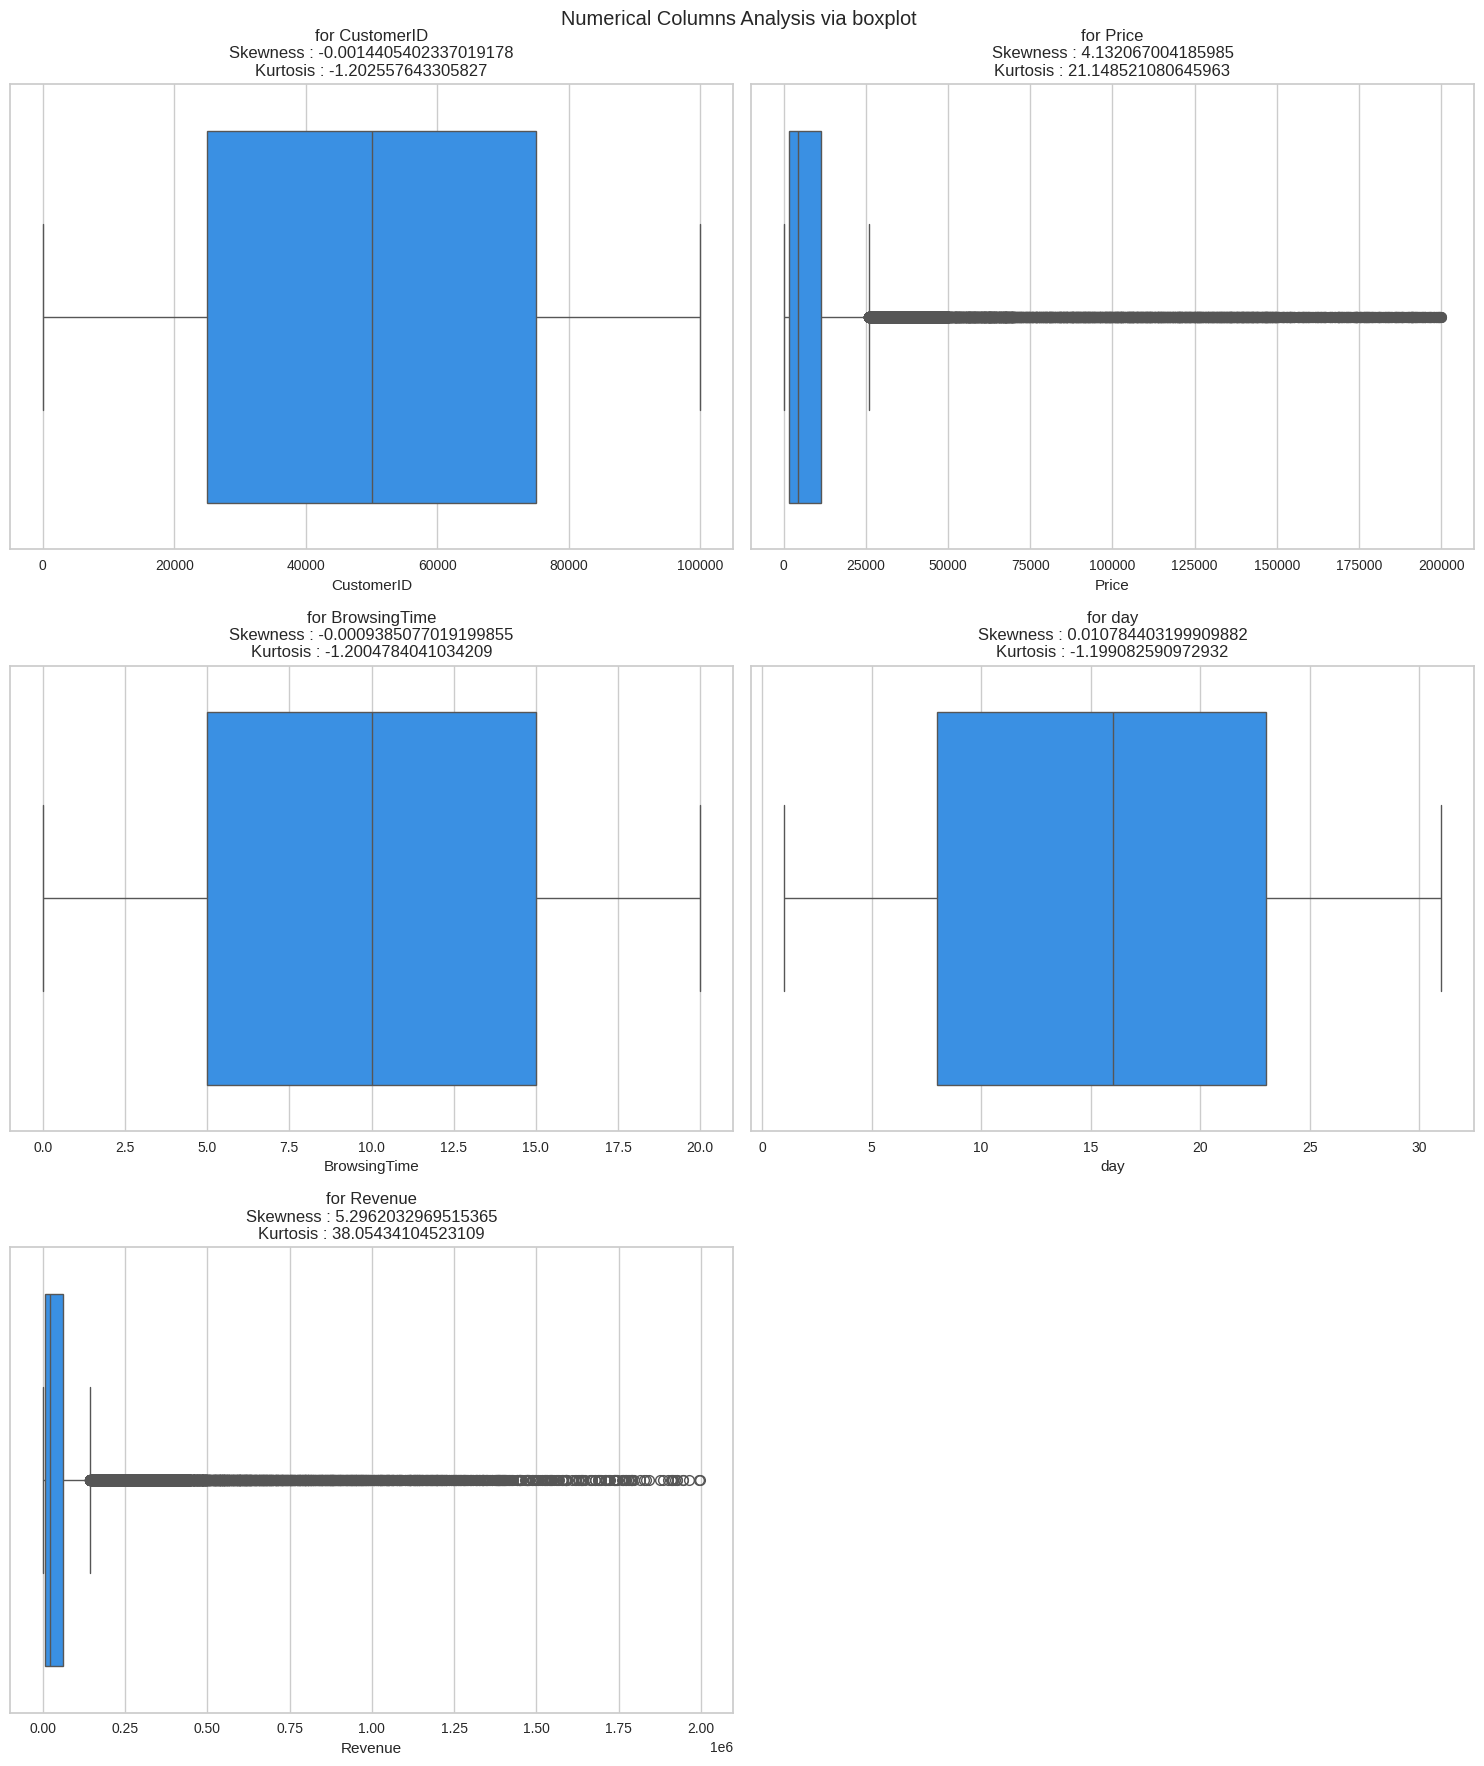

In [33]:
t = 1
plt.figure(figsize=(15,18))
plt.suptitle('Numerical Columns Analysis via boxplot ')
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=data, x = i, fill= True, color = 'dodgerblue')
    plt.title(f'''for {i}
Skewness : {data[i].skew()}
Kurtosis : {data[i].kurt()}''')
    t = t + 1
plt.tight_layout()
plt.show()


Inferences :

1. The boxplot for CustomerID shows a uniform spread without outliers, confirming evenly distributed customer representation in the dataset.

2. The Price variable contains a large number of outliers on the higher end, as evident from the long upper whisker and data points beyond it.

3. BrowsingTime appears symmetric with minimal outliers, suggesting consistent session durations across users.

4. The day variable shows a relatively even distribution with only a few mild outliers, indicating balanced data collection across the month.

5. Revenue has extreme right-skewness and a significant number of outliers, reinforcing that a small group of transactions contributes disproportionately to total earnings.

6. The IQR (interquartile range) for Price is narrow compared to the full range, indicating that most prices are clustered within a low to mid-range bracket.

7. The Revenue boxplot reveals that the majority of revenue-generating events are relatively low, with occasional high-value purchases inflating the upper bound.

8. The presence of numerous outliers in both Price and Revenue confirms heavy-tailed distributions, consistent with the prior KDE analysis.

9. The relatively compact spread of the BrowsingTime and day plots indicates no significant behavioral anomalies in browsing sessions or transaction dates.

10. The difference in scale and variability between Revenue and other features highlights the importance of normalization or log-scaling before applying algorithms sensitive to outliers.


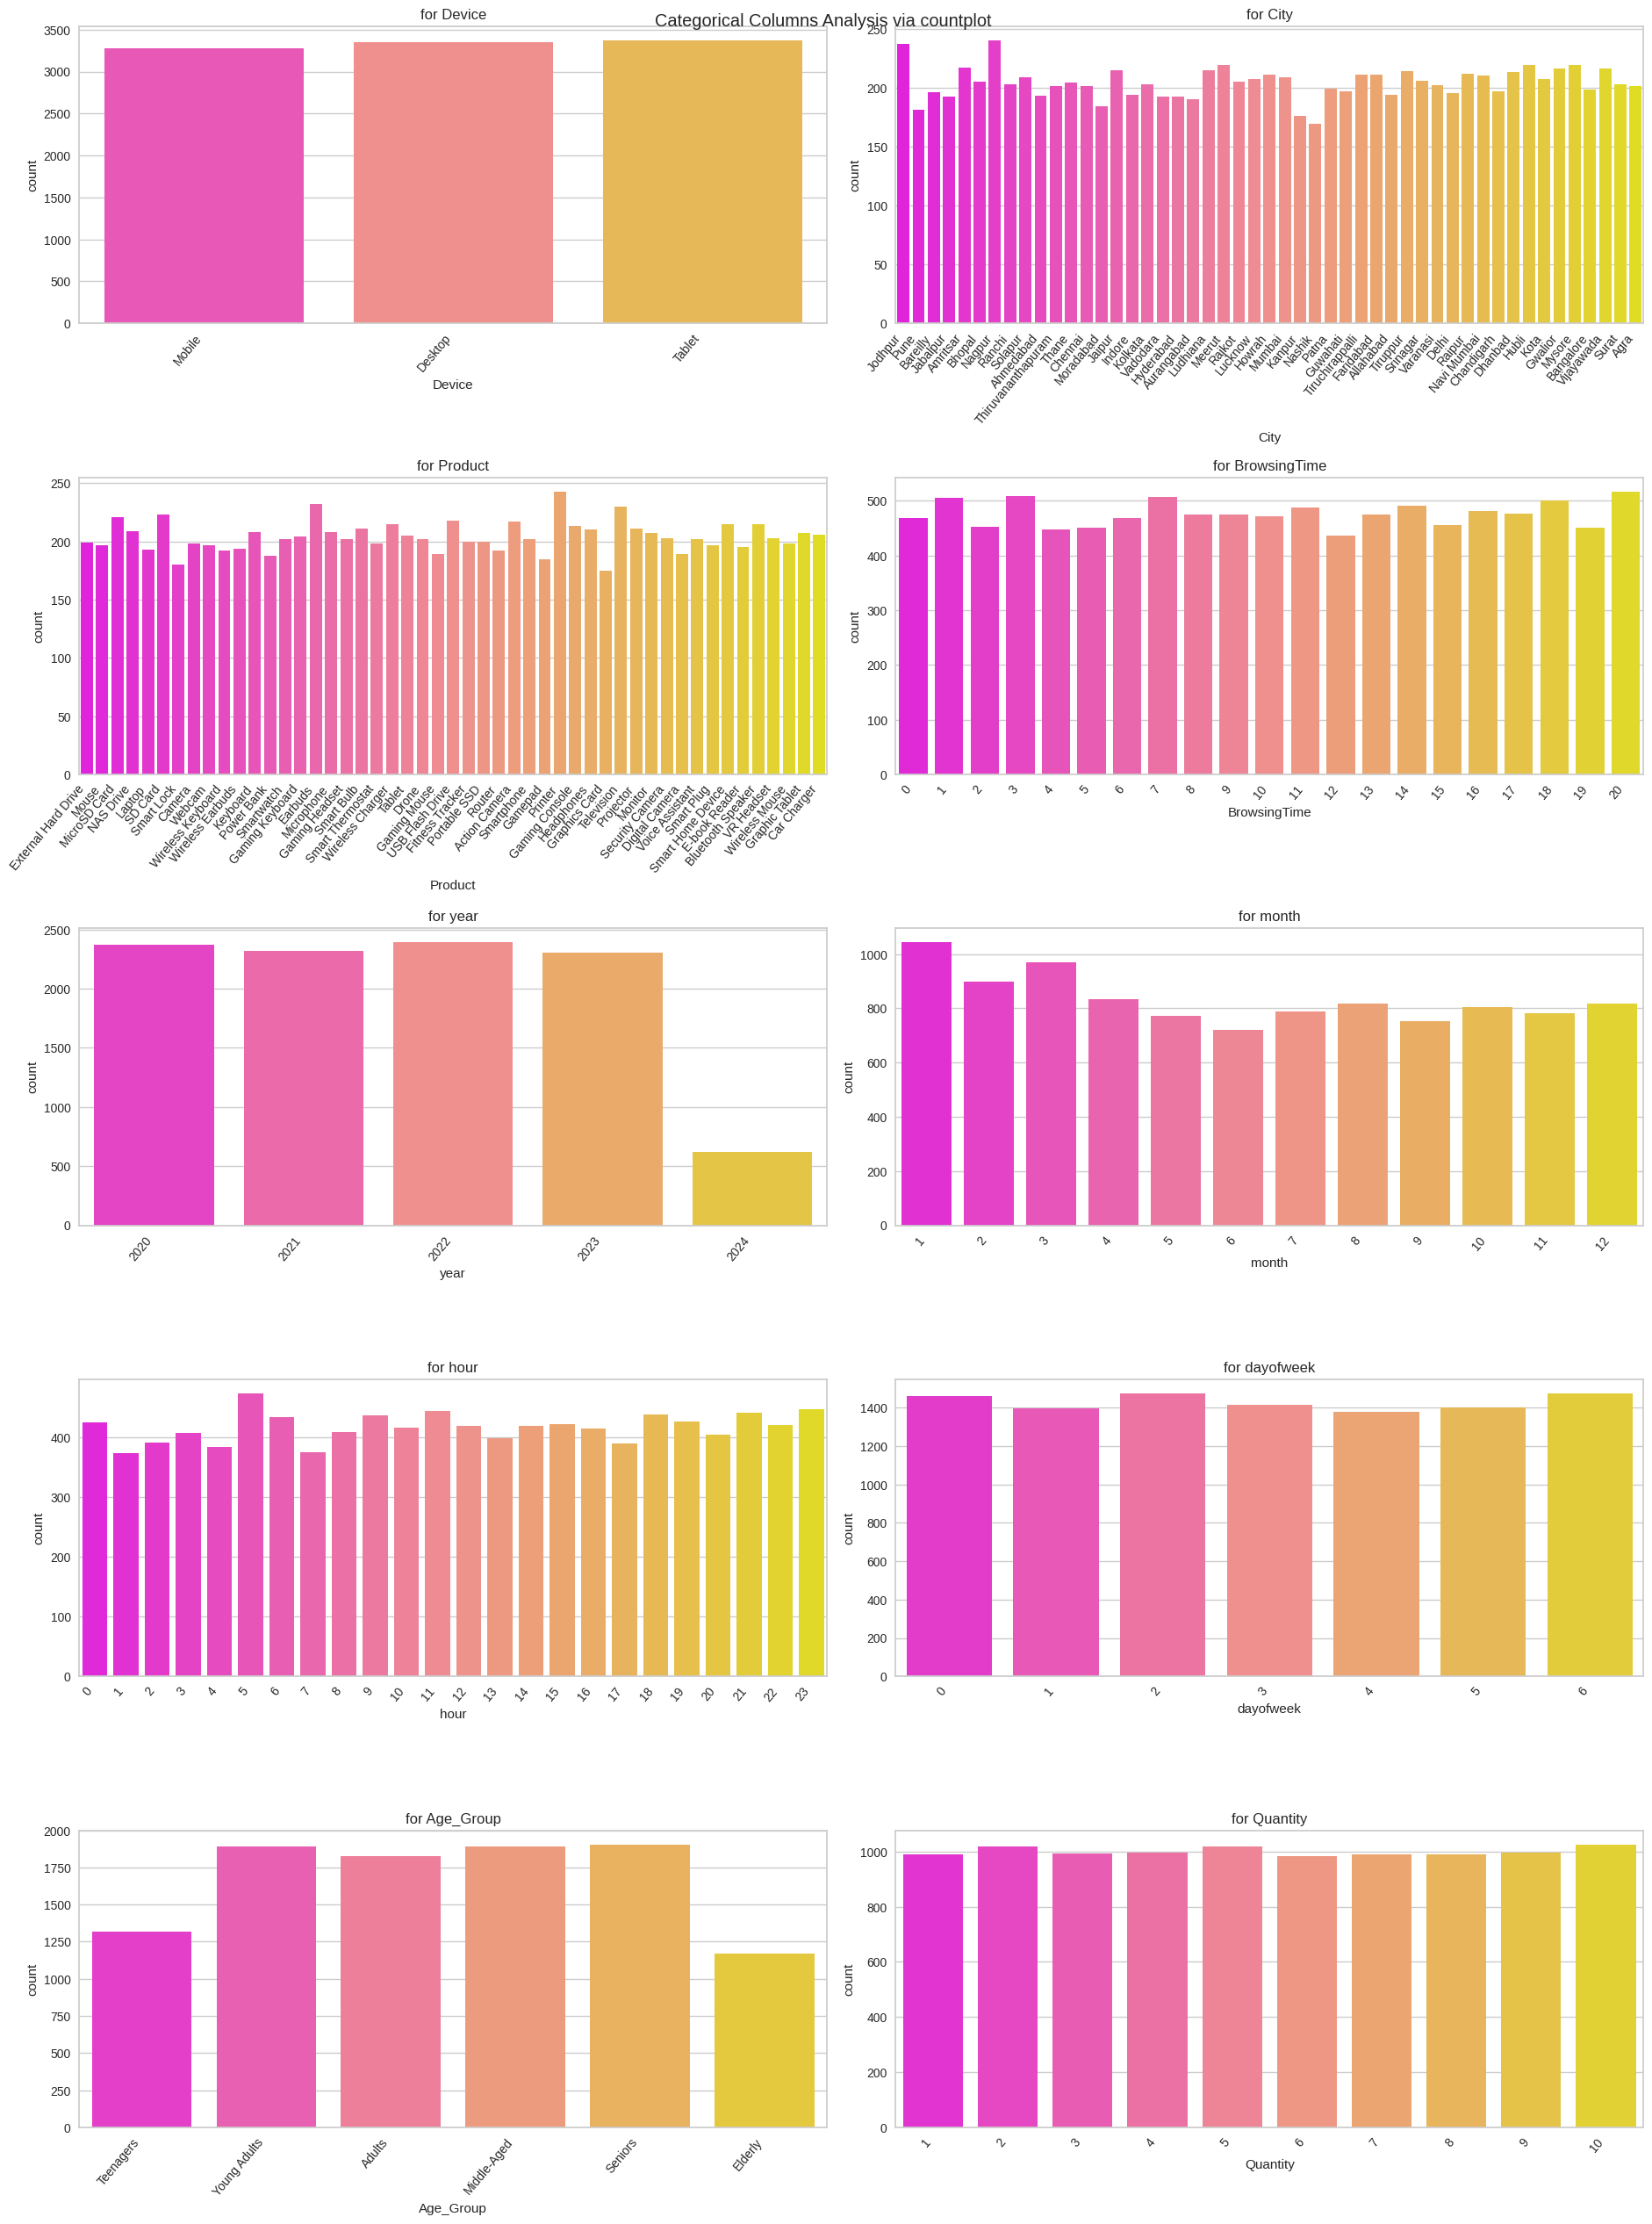

In [34]:
sampled_data = data.sample(10000, random_state=42)

t = 1
plt.figure(figsize=(19,30))
plt.suptitle('Categorical Columns Analysis via countplot ')
for i in cat_cols:
    plt.subplot(6,2,t)
    sns.countplot(data=sampled_data, x = i, palette='spring' )
    plt.xticks(rotation = 50, ha = 'right')
    plt.title(f'''for {i}''')
    t = t + 1
plt.tight_layout()
plt.show()

Inferences :

1. The boxplot for CustomerID shows a uniform spread without outliers, confirming evenly distributed customer representation in the dataset.

2. The Price variable contains a large number of outliers on the higher end, as evident from the long upper whisker and data points beyond it.

3. BrowsingTime appears symmetric with minimal outliers, suggesting consistent session durations across users.

4. The day variable shows a relatively even distribution with only a few mild outliers, indicating balanced data collection across the month.

5. Revenue has extreme right-skewness and a significant number of outliers, reinforcing that a small group of transactions contributes disproportionately to total earnings.

6. The IQR (interquartile range) for Price is narrow compared to the full range, indicating that most prices are clustered within a low to mid-range bracket.

7. The Revenue boxplot reveals that the majority of revenue-generating events are relatively low, with occasional high-value purchases inflating the upper bound.

8. The presence of numerous outliers in both Price and Revenue confirms heavy-tailed distributions, consistent with the prior KDE analysis.

9. The relatively compact spread of the BrowsingTime and day plots indicates no significant behavioral anomalies in browsing sessions or transaction dates.

10. The difference in scale and variability between Revenue and other features highlights the importance of normalization or log-scaling before applying algorithms sensitive to outliers.


In [ ]:

sns.pairplot(sampled_data, plot_kws={'color': 'orange'})


Inferences:

1. Revenue and Price show a strong positive linear relationship, indicating that higher product prices directly drive revenue growth.

2. Quantity has a weaker correlation with Revenue, implying that volume sold contributes less to revenue than pricing.

3. BrowsingTime appears independent of key sales metrics like Revenue and Quantity, suggesting user engagement duration is not directly tied to purchase behavior.

4. Day, Month, and DayOfWeek variables show no significant linear relationships with revenue-related fields, pointing to consistent sales patterns over time.

5. The variable Year demonstrates distinct clusters but no direct correlation with numeric fields, consistent with a categorical role in analysis.

6. CustomerID and other user-identifying columns are uniformly scattered, reaffirming their uniqueness and lack of analytical correlation.

7. Skewed distributions in Price and Revenue are visually confirmed, reinforcing earlier observations of high kurtosis and skewness.

8. Age_Group does not exhibit a visual trend with revenue metrics, indicating similar spending habits across different age categories.

9. Hour-wise activity and revenue are largely uncorrelated, supporting the insight that user purchases occur throughout the day without peak hours.

10. Overall, most numerical features are weakly correlated with each other, suggesting that multicollinearity is minimal and each variable may carry unique predictive value.



In [ ]:
raw_data = data.copy()

# We copied our data as for further use in encoding and scaling we want one intact copy

## **PreProcessing**

Objective is to segregate the customers on the behavior of their purchase and study the cluster for their specific characteristics and help the marketing team to identify potential group of customer .



In [ ]:
# Encode categorical columns
for l in cat_cols:
    le = LabelEncoder()
    data[l] = le.fit_transform(data[l])

In [ ]:
# As Unsupervised Learning Requires Scaled Data so we are going to scale this data with robust scaler as it is robust to outliers

sc = RobustScaler()

df = pd.DataFrame(sc.fit_transform(data), columns=data.columns)

In [ ]:
df

CustomerID  Device      City   Product     Price  Quantity  \
0       -0.806194     0.0  0.916667  0.500000 -0.007759      -0.8   
1       -0.760447     0.5  0.916667 -0.916667  3.190476       0.0   
2       -0.617344    -0.5 -0.041667 -0.125000 -0.387042      -0.8   
3       -0.610862    -0.5  0.125000 -1.000000  0.672607       0.4   
4        0.149106    -0.5 -0.500000 -0.125000 -0.176491      -0.2   
...           ...     ...       ...       ...       ...       ...   
99995   -0.128745     0.0  0.666667 -0.541667  3.469508      -0.4   
99996    0.202311     0.5  0.666667  0.125000 -0.197308      -0.2   
99997    0.018566     0.0 -0.583333 -0.958333 -0.005262       0.4   
99998    0.720623     0.0  0.916667 -0.708333 -0.415952       0.4   
99999    0.696713     0.5  0.041667  0.208333 -0.330995       0.4   

       BrowsingTime   Revenue  year     month       day      hour  dayofweek  \
0              -0.1 -0.216767  -0.5  0.333333 -0.666667 -0.500000       0.25   
1              -0.9  3.480921   0.0  0.833333  0.600000 -0.833333       0.25   
2               1.0 -0.350131   0.0  1.000000 -0.400000 -0.083333       0.50   
3              -0.2  1.226136   0.5 -0.666667  0.533333  0.416667       0.25   
4               0.0 -0.122103  -0.5  0.500000 -0.066667 -0.750000      -0.25   
...             ...       ...   ...       ...       ...       ...        ...   
99995          -1.0  2.390588   0.5  0.833333 -0.200000  0.166667      -0.75   
99996          -0.2 -0.140402   0.0  0.166667  1.000000  0.250000       0.75   
99997           0.0  0.272722  -0.5  0.166667 -0.800000  0.916667       0.75   
99998           0.9 -0.304907   1.0 -0.666667 -0.266667  0.500000      -0.75   
99999           0.6 -0.185416  -0.5  1.000000 -1.000000 -0.166667      -0.25   

       Age_Group  
0      -1.000000  
1       0.666667  
2       0.000000  
3       0.333333  
4       0.000000  
...          ...  
99995   0.000000  
99996   0.000000  
99997  -1.000000  
99998   0.333333  
99999  -0.666667  

[100000 rows x 14 columns]

### **Null Value Treatment**

In [ ]:
data.isnull().sum().sum()

np.int64(0)

### **Duplicate Rows**

In [ ]:
data.duplicated().sum()

np.int64(0)

SO OUR DATA IS OF 1 LAKH ROWS AND IT BECOMES A TRICKY TASK TO WORK ON WHOLE DATA SO WE WILL CREATE A RANDOM SAMPLE OF 3000 VALUES WHICH IS 3 % OF ORIGINAL DATA TO WORK ON IT AS VARIOUS ALGORITHMS LIKE KMEANS AND AGGLOMORATIVE CAN BECOME COMPUTATIONALLY EXPENSIVE WITH WHOLE DATA

In [ ]:
from sklearn.utils import resample
sam = resample(df,
               replace=True,
               n_samples=7000,
               random_state=2)


In [ ]:
sam

CustomerID  Device      City   Product     Price  Quantity  \
89256   -0.552871     0.5  0.041667  0.625000  2.929550       0.4   
72173   -0.843386     0.5 -0.708333 -0.125000 -0.387568       0.4   
95816   -0.838261    -0.5 -0.666667 -0.500000 -0.008652      -0.8   
44566    0.333749    -0.5  0.333333  0.333333 -0.280282       0.6   
31019   -0.594191     0.0  0.500000  0.041667 -0.096849      -0.6   
...           ...     ...       ...       ...       ...       ...   
4851     0.663748     0.0  0.208333 -0.083333  1.508405      -0.8   
43664    0.235495     0.0  0.916667  0.958333 -0.319610      -0.4   
1907    -0.000957     0.0 -0.083333  0.916667 -0.066995       0.4   
22292    0.147192    -0.5 -0.666667  0.583333  0.588256      -0.2   
14691   -0.714720     0.5  1.000000  0.958333 -0.179675       0.2   

       BrowsingTime   Revenue  year     month       day      hour  dayofweek  \
89256          -0.4  4.400493   0.0  1.000000  0.333333 -0.666667      -0.25   
72173           0.4 -0.264985  -0.5  0.833333 -0.800000  0.083333       0.00   
95816          -0.7 -0.217081   0.5  1.000000 -0.533333 -0.500000       0.25   
44566           0.7 -0.081004   0.0 -0.500000  0.400000 -0.166667      -0.50   
31019           0.0 -0.182760  -1.0 -0.666667  0.533333  0.166667      -0.75   
...             ...       ...   ...       ...       ...       ...        ...   
4851           -0.9  0.316348  -1.0  0.000000  0.533333  0.166667      -0.25   
43664           0.5 -0.274081  -0.5 -0.333333  0.533333 -0.916667       0.50   
1907            0.9  0.185897   1.0 -0.500000  0.466667 -0.583333       0.50   
22292          -0.3  0.550150   1.0 -0.833333 -0.600000 -0.250000       0.75   
14691           0.1 -0.023358  -0.5  1.000000  0.733333 -0.333333      -0.75   

       Age_Group  
89256   0.000000  
72173  -0.666667  
95816  -0.333333  
44566  -0.333333  
31019  -0.666667  
...          ...  
4851   -0.666667  
43664  -1.000000  
1907    0.666667  
22292  -0.666667  
14691   0.333333  

[7000 rows x 14 columns]

## **Unsupervised Learning**

### **K-Means Clustering**


In [ ]:
from sklearn.utils import resample


sam = resample(data,
               replace=True,
               n_samples=7000,
               random_state=42)



#### k_elbow method might not show the clear elbow in plot. So we have another method i.e, Silhoutte Visualizer to identify the value of k

In [ ]:
# Silhouette VIsualizer
n_clus = range(2,16)
t = 1
plt.figure(figsize=(15,25))
for i in n_clus:
    plt.subplot(8,2,t)
    model = KMeans(n_clusters=i, random_state=3)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(sam)
    plt.title(f' for {i} Silhouette score = {round(sil_viz.silhouette_score_,3)}')
    t += 1
plt.tight_layout()
plt.show()

We Will go with 4 Clusters

In [ ]:
model_km = KMeans(random_state=3, n_clusters=4)

In [ ]:
model_km.fit(sam)

KMeans(n_clusters=4, random_state=3)

In [ ]:
centroids = model_km.cluster_centers_

In [ ]:
label_by_KMeans = model_km.predict(sam)

In [ ]:
ser = pd.Series(label_by_KMeans).value_counts().sort_index()

pd.DataFrame(ser)

count
0   5879
1    222
2    842
3     57

In [ ]:
# Let's Visualize these clusters

sns.scatterplot(data=sam, x='Revenue', y='BrowsingTime', hue=label_by_KMeans, palette='spring')
for i in range(4):
    plt.plot(centroids[i][0], centroids[i][1], centroids[i][2], centroids[i][3], marker = 'X', ms = 16, color = 'b')
plt.show()

WE ARE NOT GETTING BETTER RESULT IN KMEANS WITH OVERLAPPING CLUSTERS AND CLUTTERED PLOT WILL MAKE US DIFFICULT TO INTERPRET RESULT


## **Agglomorative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram


In [ ]:
df # As This doesn't Have any Outliers and It is a scaled data so we are proceeding with the same data

CustomerID  Device      City   Product     Price  Quantity  \
0       -0.806194     0.0  0.916667  0.500000 -0.007759      -0.8   
1       -0.760447     0.5  0.916667 -0.916667  3.190476       0.0   
2       -0.617344    -0.5 -0.041667 -0.125000 -0.387042      -0.8   
3       -0.610862    -0.5  0.125000 -1.000000  0.672607       0.4   
4        0.149106    -0.5 -0.500000 -0.125000 -0.176491      -0.2   
...           ...     ...       ...       ...       ...       ...   
99995   -0.128745     0.0  0.666667 -0.541667  3.469508      -0.4   
99996    0.202311     0.5  0.666667  0.125000 -0.197308      -0.2   
99997    0.018566     0.0 -0.583333 -0.958333 -0.005262       0.4   
99998    0.720623     0.0  0.916667 -0.708333 -0.415952       0.4   
99999    0.696713     0.5  0.041667  0.208333 -0.330995       0.4   

       BrowsingTime   Revenue  year     month       day      hour  dayofweek  \
0              -0.1 -0.216767  -0.5  0.333333 -0.666667 -0.500000       0.25   
1              -0.9  3.480921   0.0  0.833333  0.600000 -0.833333       0.25   
2               1.0 -0.350131   0.0  1.000000 -0.400000 -0.083333       0.50   
3              -0.2  1.226136   0.5 -0.666667  0.533333  0.416667       0.25   
4               0.0 -0.122103  -0.5  0.500000 -0.066667 -0.750000      -0.25   
...             ...       ...   ...       ...       ...       ...        ...   
99995          -1.0  2.390588   0.5  0.833333 -0.200000  0.166667      -0.75   
99996          -0.2 -0.140402   0.0  0.166667  1.000000  0.250000       0.75   
99997           0.0  0.272722  -0.5  0.166667 -0.800000  0.916667       0.75   
99998           0.9 -0.304907   1.0 -0.666667 -0.266667  0.500000      -0.75   
99999           0.6 -0.185416  -0.5  1.000000 -1.000000 -0.166667      -0.25   

       Age_Group  
0      -1.000000  
1       0.666667  
2       0.000000  
3       0.333333  
4       0.000000  
...          ...  
99995   0.000000  
99996   0.000000  
99997  -1.000000  
99998   0.333333  
99999  -0.666667  

[100000 rows x 14 columns]

In [ ]:
dist = euclidean_distances(sam)
dist.shape

(7000, 7000)

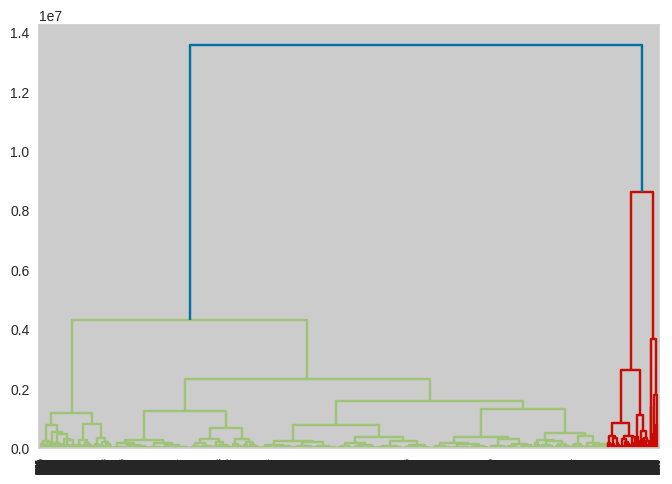

In [ ]:
dendrogram(linkage(sam, method='ward'))
plt.show()

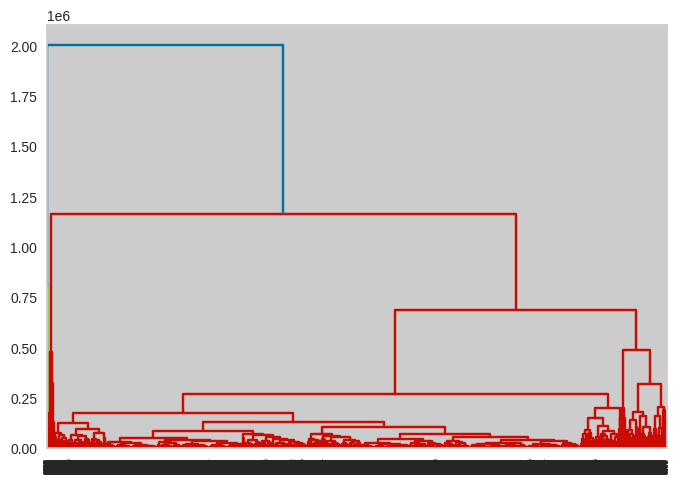

In [ ]:
dendrogram(linkage(sam, method='complete'))
plt.show()

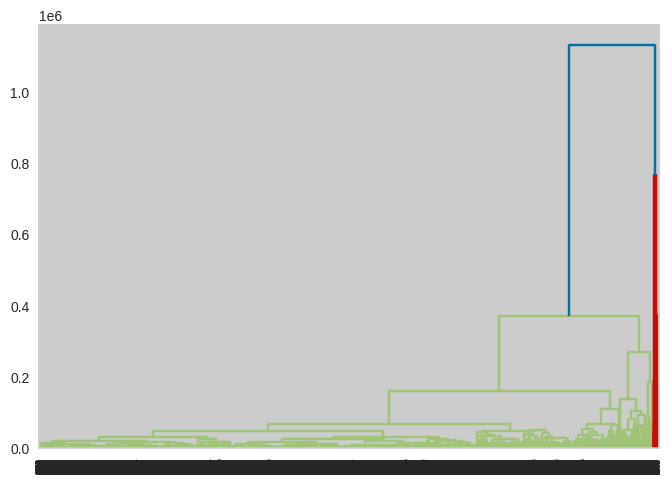

In [ ]:
dendrogram(linkage(sam, method='centroid'))
plt.show()

So we cross checking by CCC between ward linkage & complete linkage


In [ ]:
link_complete = linkage(sam, method='complete')

link_ward = linkage(sam, method='ward')

In [ ]:
actual_distance = dist[np.triu_indices(7000, k=1)]

In [ ]:
link_ward.shape

(6999, 4)

In [ ]:
ccc_ward,_ = cophenet(link_ward, actual_distance)
ccc_ward

np.float64(0.7330261073667244)

In [ ]:
ccc_comp, _ = cophenet(link_complete, actual_distance)
ccc_comp

np.float64(0.9203351408056663)

While deciding which linkage metrics with complete method we go with we should take care of these points :
1. There must be longest legs in dendrogram
2. There should be good enough density in cluster
3. it should have good CCC.

---

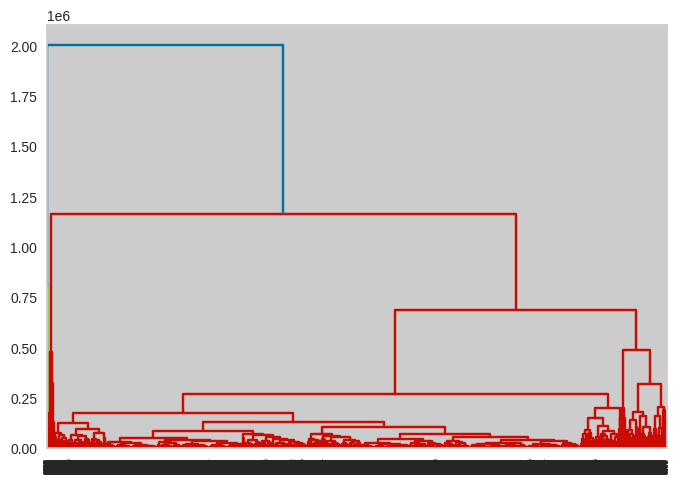

In [ ]:
dendrogram(link_complete)
plt.show()

So Here We have two options of taking either 2 to 4 clusters let's figure out

In [ ]:
model_agglo = AgglomerativeClustering(n_clusters = 4)
model_agglo.fit(sam)

AgglomerativeClustering(n_clusters=4)

In [ ]:

label_by_agglo_4_Clus = model_agglo.fit_predict(sam)
label_by_agglo_4_Clus

array([3, 1, 1, ..., 2, 1, 1])

In [ ]:
model_agglo = AgglomerativeClustering(n_clusters = 3)
model_agglo.fit(sam)


AgglomerativeClustering(n_clusters=3)

In [ ]:

label_by_agglo_3_Clus = model_agglo.fit_predict(sam)
label_by_agglo_3_Clus

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
model_agglo_recheck = AgglomerativeClustering(n_clusters = 2)
model_agglo_recheck.fit(sam)


AgglomerativeClustering()

In [ ]:
label_by_agglo_2_Clus = model_agglo_recheck.fit_predict(sam)
label_by_agglo_2_Clus

array([1, 1, 1, ..., 0, 1, 1])

Let's Check Silhouette Score of both the cluster labels which one will be best we are proceeding with that

In [ ]:
silhouette_score(sam, label_by_agglo_2_Clus)

np.float64(0.7911768989094048)

In [ ]:
silhouette_score(sam, label_by_agglo_3_Clus)

np.float64(0.7524140236354966)

In [ ]:
silhouette_score(sam, label_by_agglo_4_Clus)

np.float64(0.5651112590087627)

In [ ]:
silhouette_score(sam, label_by_KMeans)

np.float64(0.6647678000897044)

So here by silhouette Scores we realise that best clustering will be done by Agglomorative with 2 clusters Till now

But Still Let's Visualise the Agglomorative CLustering with both number of clusters

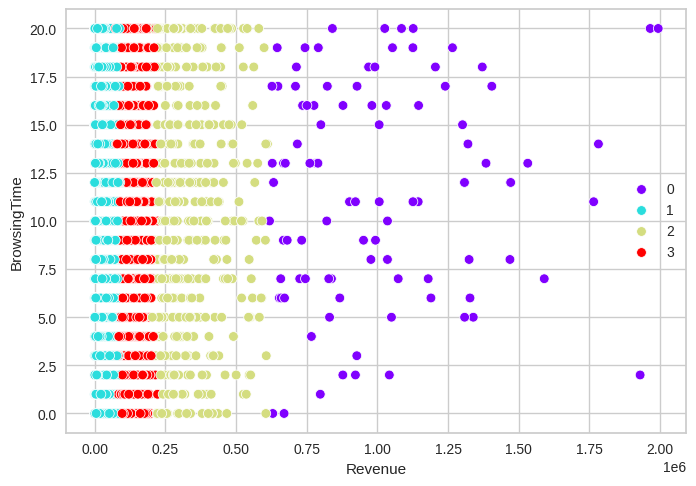

In [ ]:
sns.scatterplot(data = sam, x = 'Revenue', y = 'BrowsingTime', palette='rainbow', hue = label_by_agglo_4_Clus)
plt.show()

In [ ]:
sns.scatterplot(data = sam, x = 'Revenue', y = 'BrowsingTime', palette='spring', hue = label_by_agglo_3_Clus)
plt.show()

In [ ]:
sns.scatterplot(data = sam, x = 'Revenue', y = 'BrowsingTime', palette='winter', hue = label_by_agglo_2_Clus)
plt.show()

WE ARE GETTING HIGHER SILHOUETTE SCORE WITH 2 CLUSTER IN AGGLOMORATIVE CLUSTERRING BUT STILL WE ARE GOING WITH 3 CLUSTER AS THERE IS MINIMAL DIFFERENCE IN SILHOUETTE SCORE OF 0.39 BUT 3 CLUSTER WILL GIVE US BETTER DEPICTION OF BUSINESS ANALYSIS AND INTERPRETATION SO IT WILL GIVE BETTER SEGMENTATION WHILE IN 2 CLUSTERING WE WILL ONLY GET HIGH AND LOW SPENDING CUSTOMER WHICH IS NOT BETTER APPROACH

In [ ]:
sam['Labels'] = label_by_agglo_3_Clus

sam

CustomerID  Device  City  Product         Price  Quantity  \
15795       93237       2    48       11  20727.539586         9   
860         80994       1    48       44   1484.464735         1   
76820       89317       1    17       16  13180.040741         2   
54886       94512       0    16       25   5400.424775         8   
6265        42644       2     1       18    739.440944         2   
...           ...     ...   ...      ...           ...       ...   
61431       28055       0    36       27   2591.313733         1   
24648       32883       2    21       12   1725.705053         5   
32966       45439       2    25       11  47559.975392         5   
27777       98475       0    42       34   5859.945249         6   
32567        8288       1     8       30    645.627494         4   

       BrowsingTime        Revenue  year  month  day  hour  dayofweek  \
15795            16  207275.395860     2      4   11     1          2   
860              12    2968.929470     0      1    5     6          2   
76820            17   39540.122223     3      3   16     1          6   
54886             8   48603.822977     3      2   13     2          0   
6265             17    2218.322833     1      3   26     4          0   
...             ...            ...   ...    ...  ...   ...        ...   
61431             9    5182.627467     0      5    3    11          2   
24648            20   10354.230315     0      7   13    12          3   
32966            11  285359.852352     2      2   10     6          3   
27777            10   41019.616741     2      8   17    11          5   
32567            10    3228.137471     0      6    5    14          6   

       Age_Group  Labels  
15795          4       0  
860            0       0  
76820          3       0  
54886          0       0  
6265           4       0  
...          ...     ...  
61431          1       0  
24648          4       0  
32966          4       2  
27777          2       0  
32567          2       0  

[7000 rows x 15 columns]

In [ ]:
sam.columns

Index(['CustomerID', 'Device', 'City', 'Product', 'Price', 'Quantity',
       'BrowsingTime', 'Revenue', 'year', 'month', 'day', 'hour', 'dayofweek',
       'Age_Group', 'Labels'],
      dtype='object')

In [ ]:
features = [i for i in sam.columns if i != 'Labels']

In [ ]:
x_sample = sam[features]
y_sample = sam['Labels']


x_full = df[features]

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors = 1)
nn.fit(x_sample)



NearestNeighbors(n_neighbors=1)

In [ ]:
distances, indices = nn.kneighbors(x_full)

In [ ]:
df['final_clusters'] = y_sample.iloc[indices.flatten()].values

In [ ]:
df.loc[sam.index,'final_clusters'] = sam['Labels']

In [ ]:
df['final_clusters'].unique()

array([0, 2, 1])


## **Business Interpretation**

In [ ]:
raw_data

CustomerID   Device       City            Product         Price  \
0            9597   Mobile   Vadodara   Smart Thermostat   4441.406091   
1           11891   Tablet   Vadodara             Camera  35274.014252   
2           19067  Desktop    Kolkata         Microphone    784.924822   
3           19392  Desktop     Meerut      Action Camera  11000.476305   
4           57501  Desktop  Faridabad         Microphone   2814.737205   
...           ...      ...        ...                ...           ...   
99995       43568   Mobile   Srinagar     Gaming Console  37964.020836   
99996       60169   Tablet   Srinagar            Printer   2614.051519   
99997       50955   Mobile      Delhi  Bluetooth Speaker   4465.469808   
99998       86160   Mobile   Vadodara            Earbuds    506.209955   
99999       84961   Tablet    Lucknow             Router   1325.243854   

       Quantity  BrowsingTime        Revenue  year  month  day  hour  \
0             2             9    8882.812181  2021      8    6     5   
1             6             1  211644.085513  2022     11   25     1   
2             2            20    1569.849644  2022     12   10    10   
3             8             8   88003.810440  2023      2   24    16   
4             5            10   14073.686023  2021      9   15     2   
...         ...           ...            ...   ...    ...  ...   ...   
99995         4             0  151856.083343  2023     11   13    13   
99996         5             8   13070.257594  2022      7   31    14   
99997         8            10   35723.758467  2021      7    4    22   
99998         8            19    4049.679640  2024      2   12    17   
99999         8            16   10601.950832  2021     12    1     9   

       dayofweek     Age_Group  
0              4        Adults  
1              4  Young Adults  
2              5       Seniors  
3              4     Teenagers  
4              2       Seniors  
...          ...           ...  
99995          0       Seniors  
99996          6       Seniors  
99997          6        Adults  
99998          0     Teenagers  
99999          2       Elderly  

[100000 rows x 14 columns]

In [ ]:
# For Just Analysis Purpose I Will ALso add tags column to this encoded form of data as it makes us easy to interpret

data['labels'] = df['final_clusters']
data

CustomerID  Device  City  Product         Price  Quantity  \
0            9597       1    46       36   4441.406091         1   
1           11891       2    46        2  35274.014252         5   
2           19067       0    23       21    784.924822         1   
3           19392       0    27        0  11000.476305         7   
4           57501       0    12       21   2814.737205         4   
...           ...     ...   ...      ...           ...       ...   
99995       43568       1    40       11  37964.020836         3   
99996       60169       2    40       27   2614.051519         4   
99997       50955       1    10        1   4465.469808         7   
99998       86160       1    46        7    506.209955         7   
99999       84961       2    25       29   1325.243854         7   

       BrowsingTime        Revenue  year  month  day  hour  dayofweek  \
0                 9    8882.812181     1      7    6     5          4   
1                 1  211644.085513     2     10   25     1          4   
2                20    1569.849644     2     11   10    10          5   
3                 8   88003.810440     3      1   24    16          4   
4                10   14073.686023     1      8   15     2          2   
...             ...            ...   ...    ...  ...   ...        ...   
99995             0  151856.083343     3     10   13    13          0   
99996             8   13070.257594     2      6   31    14          6   
99997            10   35723.758467     1      6    4    22          6   
99998            19    4049.679640     4      1   12    17          0   
99999            16   10601.950832     1     11    1     9          2   

       Age_Group  labels  
0              0       0  
1              5       0  
2              3       0  
3              4       0  
4              3       0  
...          ...     ...  
99995          3       0  
99996          3       0  
99997          0       0  
99998          4       0  
99999          1       0  

[100000 rows x 15 columns]

In [ ]:
data.groupby(by = 'labels').mean().T

labels                   0             1              2
CustomerID    50000.249449  4.984010e+04   48978.823913
Device            1.001699  9.032258e-01       0.986957
City             24.103010  2.275269e+01      23.432609
Product          23.991252  3.380645e+01      20.569565
Price         12201.097750  1.321399e+05   52739.308006
Quantity          4.497602  6.763441e+00       6.415217
BrowsingTime     10.004807  1.164516e+01      10.286957
Revenue       66698.361336  1.004618e+06  336689.854357
year              1.651463  1.430108e+00       1.660870
month             5.246704  5.720430e+00       5.528261
day              15.677497  1.563441e+01      16.236957
hour             11.515712  1.098925e+01      11.678261
dayofweek         2.997979  3.010753e+00       2.802174
Age_Group         2.529046  2.322581e+00       2.458696

INFERENCES :

- Customers have label 1 have high browsing time and generate high revenue as well

- Customers have label 0 have least browsing time among all but also they generate very less revenue though their mean browsing time is just 20 min less than label 2 customers but still their revenue is just 1/6th of revenue generated by label 1 customers

- Customers have label 2 have good browsing Time and have generate a good revenue but still they can generate more

Now we tag our Customers

label 1 = Loyal Customers

label 2 = Potential Customers

label 3 = At Risk Customer

In [ ]:
raw_data['Tags'] = df['final_clusters']
raw_data

CustomerID   Device       City            Product         Price  \
0            9597   Mobile   Vadodara   Smart Thermostat   4441.406091   
1           11891   Tablet   Vadodara             Camera  35274.014252   
2           19067  Desktop    Kolkata         Microphone    784.924822   
3           19392  Desktop     Meerut      Action Camera  11000.476305   
4           57501  Desktop  Faridabad         Microphone   2814.737205   
...           ...      ...        ...                ...           ...   
99995       43568   Mobile   Srinagar     Gaming Console  37964.020836   
99996       60169   Tablet   Srinagar            Printer   2614.051519   
99997       50955   Mobile      Delhi  Bluetooth Speaker   4465.469808   
99998       86160   Mobile   Vadodara            Earbuds    506.209955   
99999       84961   Tablet    Lucknow             Router   1325.243854   

       Quantity  BrowsingTime        Revenue  year  month  day  hour  \
0             2             9    8882.812181  2021      8    6     5   
1             6             1  211644.085513  2022     11   25     1   
2             2            20    1569.849644  2022     12   10    10   
3             8             8   88003.810440  2023      2   24    16   
4             5            10   14073.686023  2021      9   15     2   
...         ...           ...            ...   ...    ...  ...   ...   
99995         4             0  151856.083343  2023     11   13    13   
99996         5             8   13070.257594  2022      7   31    14   
99997         8            10   35723.758467  2021      7    4    22   
99998         8            19    4049.679640  2024      2   12    17   
99999         8            16   10601.950832  2021     12    1     9   

       dayofweek     Age_Group  Tags  
0              4        Adults     0  
1              4  Young Adults     0  
2              5       Seniors     0  
3              4     Teenagers     0  
4              2       Seniors     0  
...          ...           ...   ...  
99995          0       Seniors     0  
99996          6       Seniors     0  
99997          6        Adults     0  
99998          0     Teenagers     0  
99999          2       Elderly     0  

[100000 rows x 15 columns]

In [ ]:
mapdict = {0:'AT RISK CUSTOMER',1:'LOYAL CUSTOMER',
           2:'POTENTIAL CUSTOMER'}

raw_data['Tags'] = raw_data['Tags'].map(mapdict)

In [ ]:
raw_data

CustomerID   Device       City            Product         Price  \
0            9597   Mobile   Vadodara   Smart Thermostat   4441.406091   
1           11891   Tablet   Vadodara             Camera  35274.014252   
2           19067  Desktop    Kolkata         Microphone    784.924822   
3           19392  Desktop     Meerut      Action Camera  11000.476305   
4           57501  Desktop  Faridabad         Microphone   2814.737205   
...           ...      ...        ...                ...           ...   
99995       43568   Mobile   Srinagar     Gaming Console  37964.020836   
99996       60169   Tablet   Srinagar            Printer   2614.051519   
99997       50955   Mobile      Delhi  Bluetooth Speaker   4465.469808   
99998       86160   Mobile   Vadodara            Earbuds    506.209955   
99999       84961   Tablet    Lucknow             Router   1325.243854   

       Quantity  BrowsingTime        Revenue  year  month  day  hour  \
0             2             9    8882.812181  2021      8    6     5   
1             6             1  211644.085513  2022     11   25     1   
2             2            20    1569.849644  2022     12   10    10   
3             8             8   88003.810440  2023      2   24    16   
4             5            10   14073.686023  2021      9   15     2   
...         ...           ...            ...   ...    ...  ...   ...   
99995         4             0  151856.083343  2023     11   13    13   
99996         5             8   13070.257594  2022      7   31    14   
99997         8            10   35723.758467  2021      7    4    22   
99998         8            19    4049.679640  2024      2   12    17   
99999         8            16   10601.950832  2021     12    1     9   

       dayofweek     Age_Group              Tags  
0              4        Adults  AT RISK CUSTOMER  
1              4  Young Adults  AT RISK CUSTOMER  
2              5       Seniors  AT RISK CUSTOMER  
3              4     Teenagers  AT RISK CUSTOMER  
4              2       Seniors  AT RISK CUSTOMER  
...          ...           ...               ...  
99995          0       Seniors  AT RISK CUSTOMER  
99996          6       Seniors  AT RISK CUSTOMER  
99997          6        Adults  AT RISK CUSTOMER  
99998          0     Teenagers  AT RISK CUSTOMER  
99999          2       Elderly  AT RISK CUSTOMER  

[100000 rows x 15 columns]

# Business Insights and Strategic Recommendations

## Objective
Utilize key behavioral and transactional metrics to:
- Convert Potential Customers (Label 0) into Loyal Customers (Label 1)
- Elevate At-Risk Customers (Label 2) to at least Potential status



---

## Insights and Recommendations

### 1. Low Revenue Among Potential Customers
**Insight:** Revenue from Label 0 is significantly lower compared to Label 1.  
**Recommendation:** Implement entry-level offers, welcome discounts, and product bundles to increase initial transaction value.

### 2. Limited Browsing Duration
**Insight:** Browsing time for Label 0 is the lowest.  
**Recommendation:** Improve on-site engagement through personalized product suggestions, content recommendations, and UX enhancements.

### 3. Narrow Product Interaction Range
**Insight:** Label 0 interacts with fewer product categories than Label 1.  
**Recommendation:** Promote diversified product recommendations and highlight category exploration through homepage design and recommendation engines.

### 4. Low Average Selling Price
**Insight:** Price interaction for Label 0 is considerably lower.  
**Recommendation:** Introduce flexible payment options, promotional pricing, and upselling strategies to encourage higher-value purchases.

### 5. Smaller Quantity per Order
**Insight:** Purchase quantity is lower in Label 0.  
**Recommendation:** Encourage bulk purchases through quantity discounts, free shipping thresholds, or loyalty points for higher quantities.

### 6. Time of Engagement Differences
**Insight:** Label 1 shows slightly higher browsing during specific hours.  
**Recommendation:** Deploy marketing campaigns and real-time engagement nudges during peak activity hours identified in loyal customer behavior.

### 7. Age Group Patterns
**Insight:** Loyal customers are slightly younger on average.  
**Recommendation:** Tailor marketing communication and UX for the younger segments, while creating conversion incentives for older demographics.

### 8. Geographic Variation
**Insight:** City distribution varies across labels.  
**Recommendation:** Launch localized marketing campaigns and region-specific offers in areas with a higher concentration of Label 0 and Label 2 users.

### 9. Device Usage Insights
**Insight:** Device preferences show subtle differences.  
**Recommendation:** Ensure optimal performance and user experience across devices, particularly mobile, which may dominate engagement in Labels 0 and 2.

### 10. Day of Week Trends
**Insight:** Weekday engagement patterns show minor variation.  
**Recommendation:** Time marketing messages and campaigns according to historically low-engagement days to increase visibility and recall.

### 11. Correlation Between Price and Loyalty
**Insight:** Higher average product prices correlate with increased loyalty.  
**Recommendation:** Highlight premium product benefits and integrate trust-building signals (e.g., reviews, guarantees) to increase perceived value.

### 12. Moderate Activity Among At-Risk Customers
**Insight:** At-risk users (Label 2) still demonstrate moderate browsing and transaction values.  
**Recommendation:** Implement re-engagement workflows, such as personalized emails or reminders, to prevent churn and maintain activity levels.

### 13. Funnel Positioning Across Labels
**Insight:** Labels represent distinct stages in the customer lifecycle.  
**Recommendation:** Develop stage-specific interventions—educational for potential users, reward-based for loyal users, and win-back tactics for at-risk users.

---

## Conclusion
By implementing these strategic actions based on customer segmentation, businesses can optimize engagement, improve conversion rates, and increase overall customer lifetime value.
